In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('data/diabetes.csv')
# https://www.kaggle.com/datasets/whenamancodes/predict-diabities

In [3]:
df_raw

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# check for NAs
df_raw.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
len(df_raw)

768

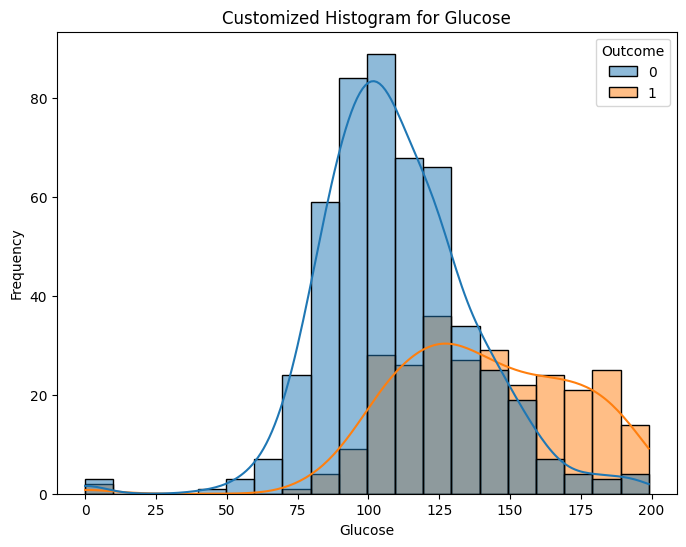

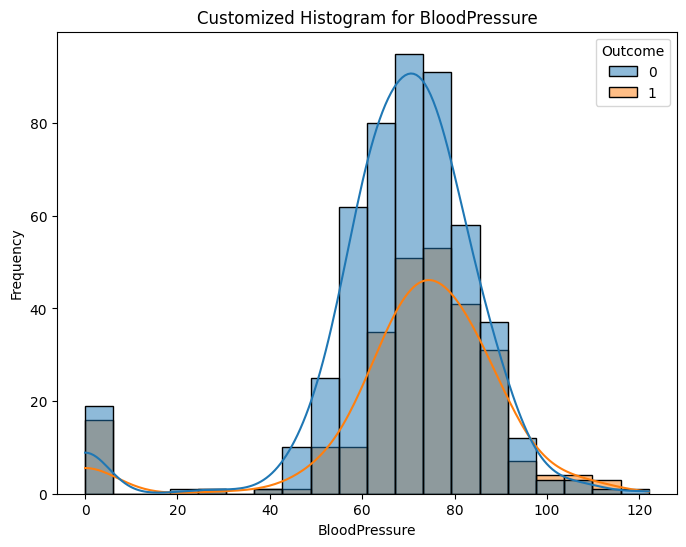

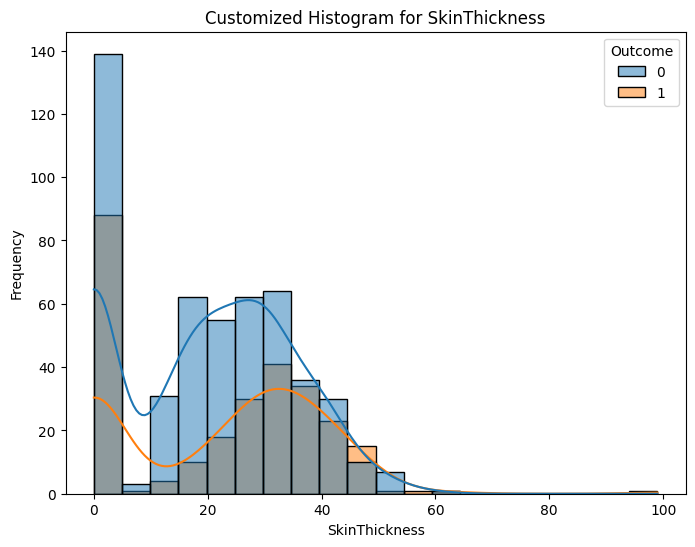

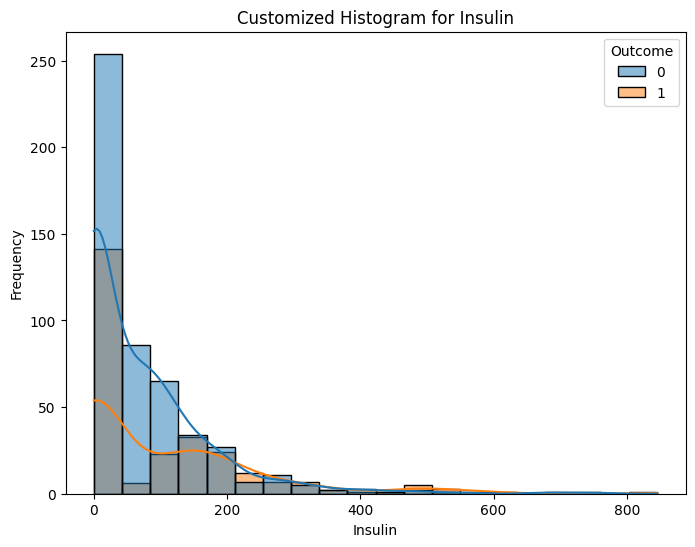

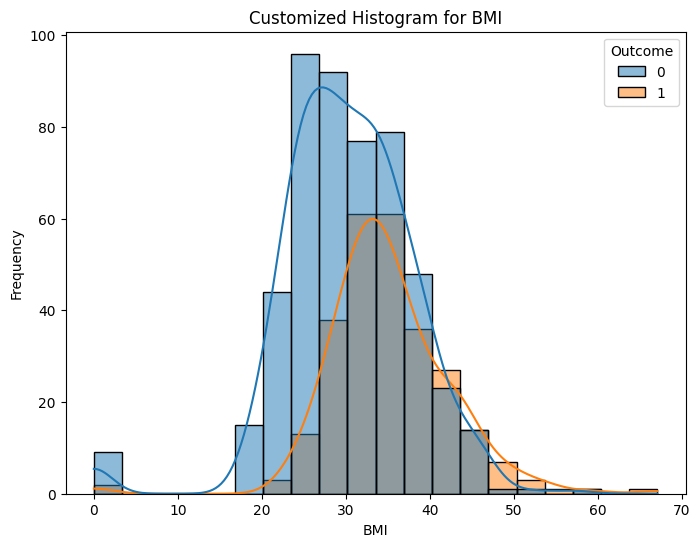

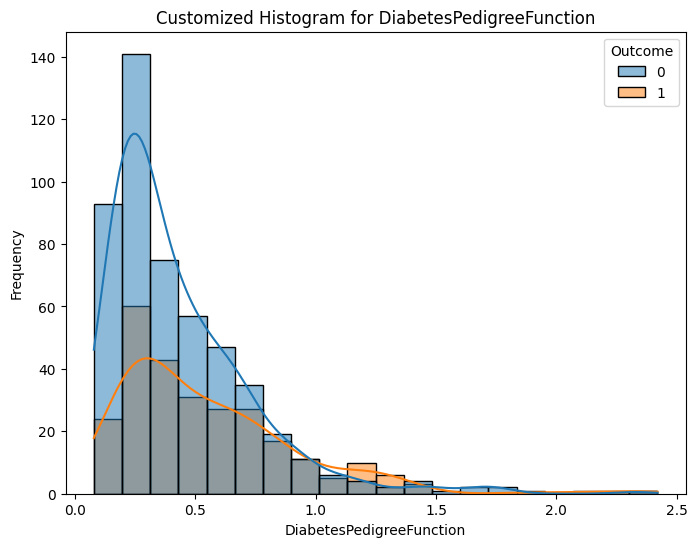

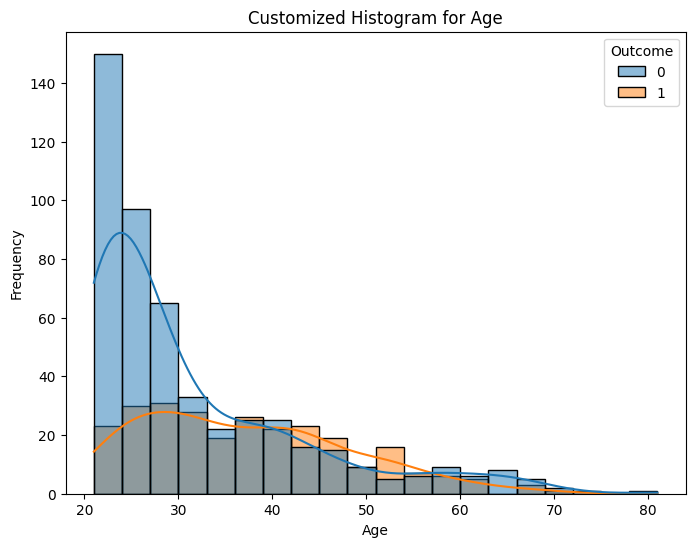

In [6]:
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for variable in variables:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.histplot(data=df_raw, x=variable, hue = 'Outcome', kde=True, bins=20)
    
    # Customize other plot properties
    plt.title(f"Customized Histogram for {variable}")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    
    # Show the plot
    plt.show()


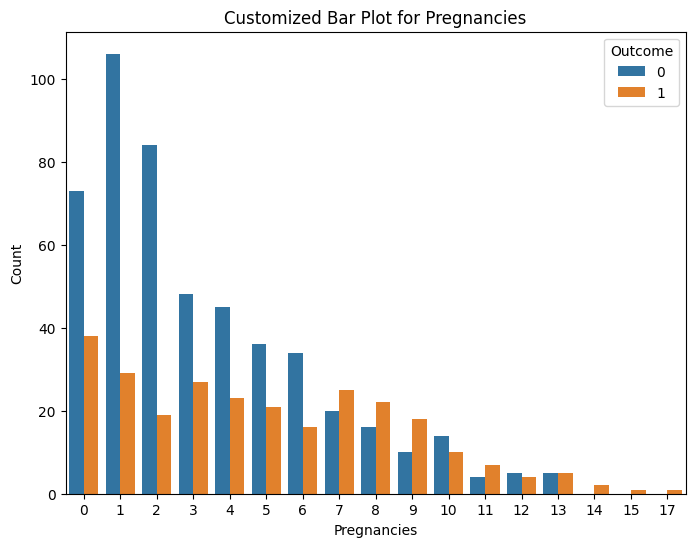

In [7]:
discrete_variables = ['Pregnancies']

for variable in discrete_variables:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.countplot(data=df_raw, x=variable, hue = 'Outcome') 
    
    # Customize other plot properties
    plt.title(f"Customized Bar Plot for {variable}")
    plt.xlabel(variable)
    plt.ylabel("Count")
    
    # Show the plot
    plt.show()

In [8]:
# col_dist = df.drop(['Pregnancies' , 'DiabetesPedigreeFunction','Outcome'] , axis=1).columns

# for col in col_dist : 
#     print(f'{col} : {len(df[df[col] == 0])}' )


In [9]:
# for col in col_dist : 
#     df[col] = df[col].apply(lambda x : df[col].median() if x == 0 else x)
    

# for col in col_dist : 
#     print(f'{col} : {len(df[df[col] == 0])}' )

In [10]:
from sklearn.linear_model import LinearRegression

def predict_with_regression(data, target_variable, predictor_variables):
    # Split the dataset into two parts: one with non-zero values and one with zero values
    training_data = data[data[target_variable] != 0]
    prediction_data = data[data[target_variable] == 0]

    # Separate the training data into features (X) and the target variable (y)
    X_train = training_data[predictor_variables]
    y_train = training_data[target_variable]

    # Create a Linear Regression model and fit it to the training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Use the trained model to predict values for the zero entries in the prediction set
    X_pred = prediction_data[predictor_variables]
    predicted_values = model.predict(X_pred)

    # Replace the zero values in the original dataset with the predicted values
    data.loc[data[target_variable] == 0, target_variable] = predicted_values

    return data




In [11]:
df_1 = predict_with_regression(df_raw, 'Glucose', ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],)

In [12]:
df_2 = predict_with_regression(df_raw, 'BloodPressure', ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],)

In [13]:
df_3 = predict_with_regression(df_raw, 'SkinThickness', ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],)

In [14]:
df_4 = predict_with_regression(df_raw, 'Insulin', ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],)

In [15]:
df_5 = predict_with_regression(df_raw, 'BMI', ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
       'SkinThickness', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],)

In [16]:
# Check for NAs
df = df_5.copy()

cols = df.drop(['Pregnancies' , 'DiabetesPedigreeFunction','Outcome'] , axis=1).columns

for col in cols : 
    print(f'{col} : {len(df[df[col] == 0])}' )

Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
Age : 0


[Text(0, 0, '500'), Text(0, 0, '268')]

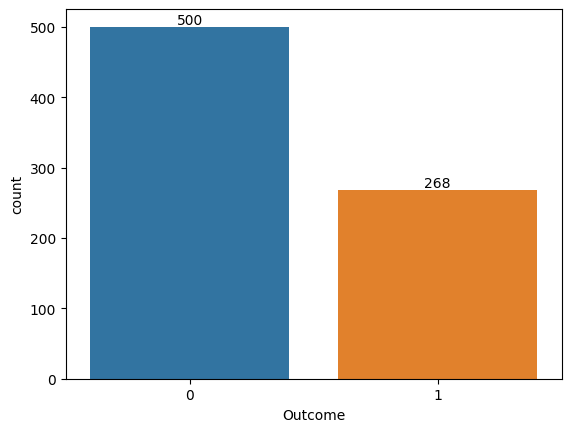

In [17]:
ax = sns.countplot(data = df, x = 'Outcome')
ax.bar_label(ax.containers[0])

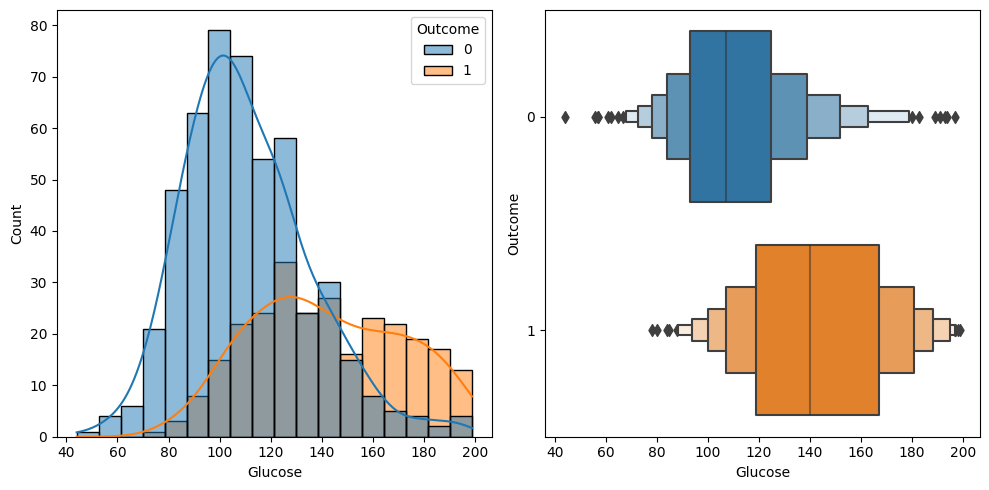

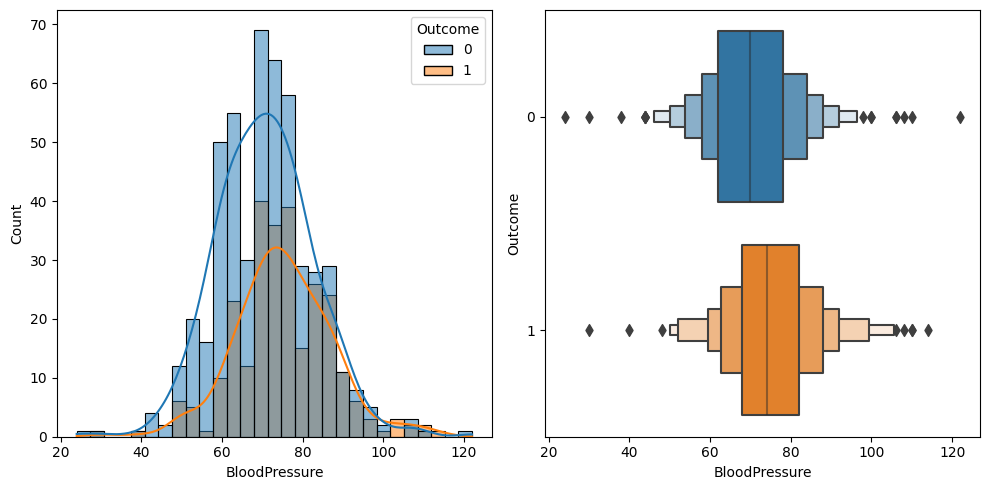

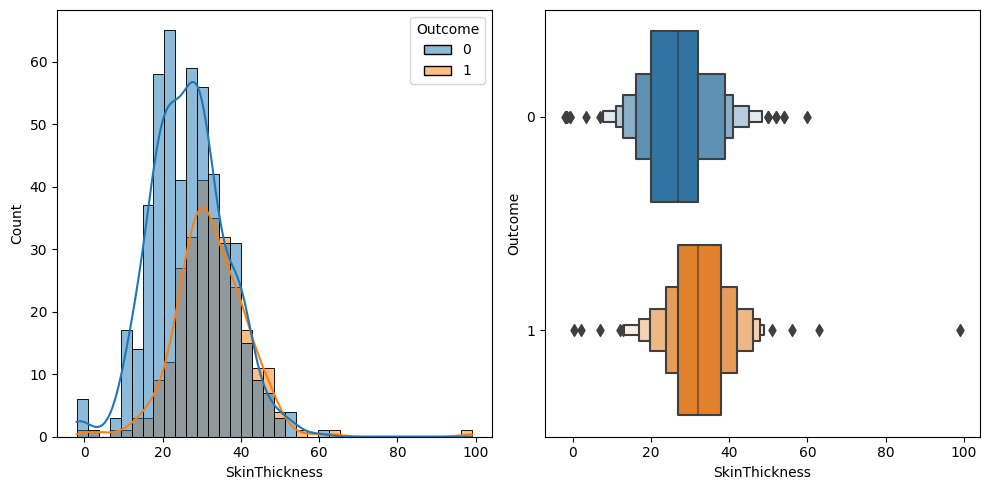

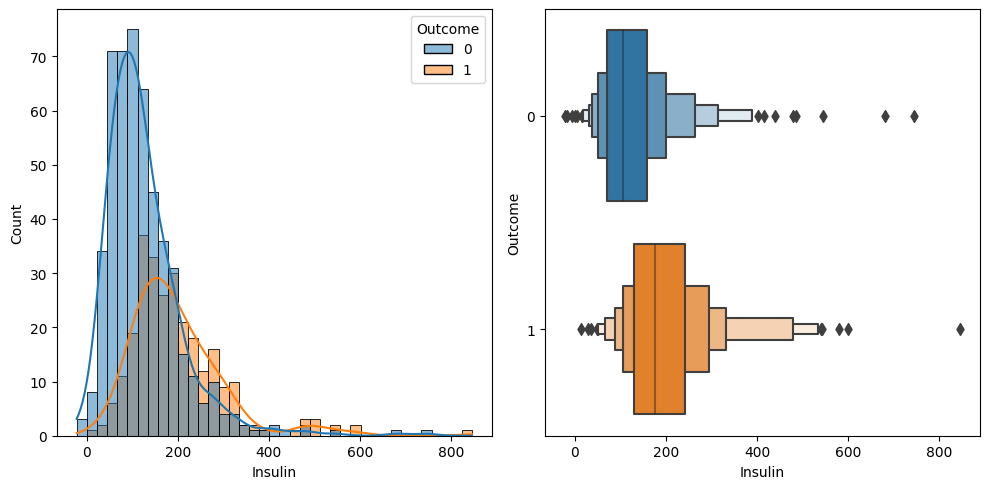

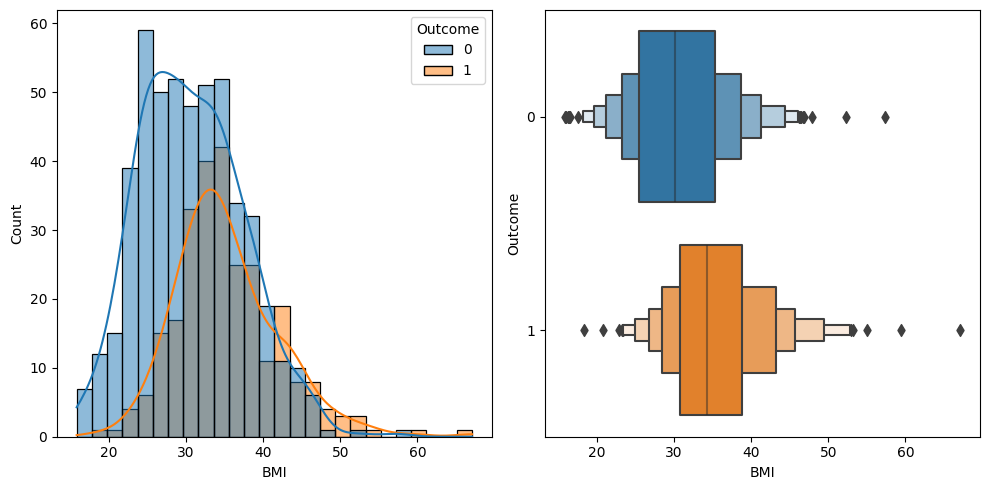

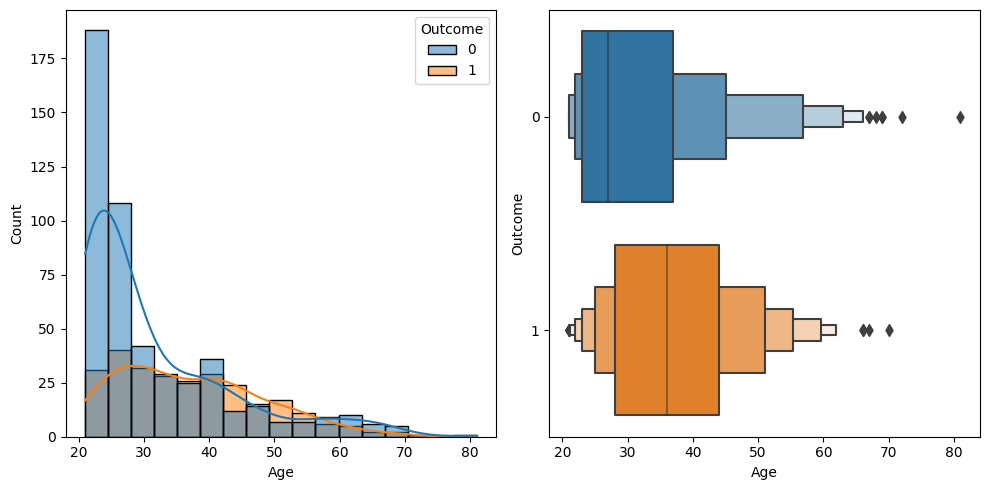

In [18]:
def dist_box_plot(col):
    fig , axs = plt.subplots(nrows=1, ncols=2 , figsize=(10,5) , sharex=True)
    axs = axs.ravel()

    sns.histplot(data=df, x=col, kde=True, hue='Outcome', ax=axs[0])
    sns.boxenplot(data=df, x=col, y='Outcome', orient='h', ax=axs[1])
    plt.tight_layout()
    plt.show()
    print('\n')
    
    
# Show Distribution of Each Feature by Outcome
for col in cols : 
    dist_box_plot(col)

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split your data into features (X) and the target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split your data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create an AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(n_estimators=1000, random_state=123)

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adaboost_classifier.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion)

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        96
           1       0.71      0.64      0.67        58

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.76      0.77      0.76       154


Confusion Matrix:
[[81 15]
 [21 37]]


In [20]:
from sklearn.model_selection import GridSearchCV

# Create an AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(random_state=123)


# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5, 2, 2.5, 3.0, 4.0, 5.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, scoring='accuracy', cv=7)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_classifier = grid_search.best_estimator_

# Make predictions on the testing data using the best classifier
y_pred = best_classifier.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# classification report
report = classification_report(y_test, y_pred)

# confusion matrix
confusion = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(report)

print("\nConfusion Matrix:")
print(confusion)

# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        96
           1       0.68      0.62      0.65        58

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.74      0.75      0.74       154


Confusion Matrix:
[[79 17]
 [22 36]]

Best Hyperparameters:
{'learning_rate': 0.1, 'n_estimators': 500}


In [23]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state = 123)

# Train the XGBoost classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion)


Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        96
           1       0.71      0.78      0.74        58

    accuracy                           0.80       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.80      0.80      0.80       154


Confusion Matrix:
[[78 18]
 [13 45]]


In [24]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state = 123)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5, 2, 2.5, 3.0, 4.0, 5.0],
    'max_depth': [3, 4, 5, 7, 10, 15]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=7)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_classifier = grid_search.best_estimator_

# Make predictions on the testing data using the best classifier
y_pred = best_classifier.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion)

# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        96
           1       0.75      0.72      0.74        58

    accuracy                           0.81       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.80      0.81      0.80       154


Confusion Matrix:
[[82 14]
 [16 42]]

Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
